**Zumofen Guillaume, 11-206-950**
Route de la Crête Blanche 28 B
3977 Granges
guillaume.zumofen@ipw.unibe.ch

### Data Science Project - Module 2

# Political Representation in the Swiss Parliament

14 october 2020


### 1. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadr
from scipy import stats

### 2. Import/Prepare dataset

In [168]:
data_swissparl_2 = pd.read_csv('data_swissparl_vote.csv')
pd.set_option('display.max_rows', 100)
data_swissparl_2

,v1,id,status,year,sex,canton,party,party_name,parl_group,name,...,yes_vote,no_vote,abstain_vote,excused_vote,missing_vote,decision_vote,commission_v,department_v,own_party,political_party
0,627,20114004,Erledigt,2011,f,BL,POCH,Progressive Organisation der Schweiz,"Fraktion der PdA, PSA, POCH",Leutenegger Oberholzer Susanne,...,54,120,13,0,12,0,NaN,3,0,Other
1,660,20114040,Erledigt,2011,Undefined,XX,NaN,NaN,NaN,NaN,...,105,59,1,1,33,1,4.0,6,0,Other
2,661,20114041,Erledigt,2011,Undefined,XX,NaN,NaN,NaN,NaN,...,171,1,1,1,25,1,2.0,8,0,Other
3,669,20114049,Erledigt,2011,Undefined,XX,NaN,NaN,NaN,NaN,...,104,58,0,1,36,1,11.0,6,0,Other
4,675,20114073,Abgeschrieben,2011,m,AG,SP,Sozialdemokratische Partei der Schweiz,Sozialdemokratische Fraktion,Wermuth C<U+00E9>dric,...,112,71,4,1,10,1,NaN,5,46,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2953,20153484,Angenommen,2015,Undefined,XX,NaN,NaN,NaN,NaN,...,53,136,1,3,6,0,5.0,8,0,Other
1446,2953,20153484,Angenommen,2015,Undefined,XX,NaN,NaN,NaN,NaN,...,71,119,1,3,5,0,5.0,8,0,Other
1447,3519,20163350,Motion an 2. Rat,2016,Undefined,XX,NaN,NaN,NaN,NaN,...,127,55,5,2,10,1,9.0,7,1,Other
1448,3849,20164113,Erledigt,2016,Undefined,XX,NaN,NaN,NaN,NaN,...,61,126,2,3,7,0,NaN,5,1,Other


In [169]:
data_swissparl_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   v1                     1450 non-null   int64  
 1   id                     1450 non-null   int64  
 2   status                 1450 non-null   object 
 3   year                   1450 non-null   int64  
 4   sex                    1450 non-null   object 
 5   canton                 1450 non-null   object 
 6   party                  1098 non-null   object 
 7   party_name             1097 non-null   object 
 8   parl_group             1103 non-null   object 
 9   name                   1103 non-null   object 
 10  language               1450 non-null   object 
 11  date_join              1103 non-null   object 
 12  date_leave             302 non-null    object 
 13  council                1450 non-null   object 
 14  affair_number          1450 non-null   float64
 15  affa

In [170]:
data_swissparl_onehot = pd.get_dummies(data_swissparl_2, columns=['sex', 'canton', 'political_party', 'affair_type', 'year_affair', 'legislative_periods_v', 'commission', 'department'])

In [171]:
pd.get_dummies(data_swissparl_2, columns=['sex', 'canton', 'political_party', 'affair_type', 'year_affair', 'legislative_periods_v', 'commission', 'department']).head()

,v1,id,status,year,party,party_name,parl_group,name,language,date_join,...,commission_WBK,department_ChF,department_DDPS,department_DEFR,department_DETEC,department_DFAE,department_DFF,department_DFI,department_DFJP,department_Parl
0,627,20114004,Erledigt,2011,POCH,Progressive Organisation der Schweiz,"Fraktion der PdA, PSA, POCH",Leutenegger Oberholzer Susanne,de,1987-12-01,...,0,0,0,1,0,0,0,0,0,0
1,660,20114040,Erledigt,2011,NaN,NaN,NaN,NaN,de,NaN,...,0,0,0,0,0,0,1,0,0,0
2,661,20114041,Erledigt,2011,NaN,NaN,NaN,NaN,de,NaN,...,0,0,0,0,0,0,0,0,1,0
3,669,20114049,Erledigt,2011,NaN,NaN,NaN,NaN,de,NaN,...,0,0,0,0,0,0,1,0,0,0
4,675,20114073,Abgeschrieben,2011,SP,Sozialdemokratische Partei der Schweiz,Sozialdemokratische Fraktion,Wermuth C<U+00E9>dric,de,2011-12-05,...,0,0,0,0,0,1,0,0,0,0


In [172]:
data_swissparl_ml = data_swissparl_onehot[['sex_f', 'sex_m', 'sex_Undefined', 'canton_AG', 'canton_AI', 'canton_AR',
                                    'canton_BE','canton_BL','canton_BS','canton_FR','canton_GE','canton_GL',
                                    'canton_AG','canton_GR','canton_JU','canton_LU','canton_NE', 'canton_NW',
                                    'canton_OW', 'canton_SG','canton_SH','canton_SO', 'canton_SZ','canton_TG',
                                    'canton_TI', 'canton_VD','canton_VS','canton_XX','canton_ZH','canton_ZG',
                                    'political_party_CVP','political_party_FDP','political_party_SP', 'political_party_SVP',
                                    'political_party_GPS','political_party_GLP','political_party_BDP', 'political_party_Other',
                                    'affair_type_Motion', 'year_affair_11', 'year_affair_12','year_affair_13','year_affair_14',
                                    'year_affair_15', 'year_affair_16', 'year_affair_17', 'year_affair_18', 'legislative_periods_v_49',
                                    'commission_Bu', 'commission_CAJ', 'commission_CEATE','commission_CER', 'commission_CIP', 'commission_CPE',
                                    'commission_CPS', 'commission_CSEC','commission_CSSS','commission_CTT', 'commission_CdF','commission_CdG',
                                    'commission_FK','commission_KVF','commission_None','commission_RK','commission_SPK','commission_WBK',
                                    'department_ChF','department_DDPS','department_DEFR', 'department_DETEC','department_DFAE',
                                    'department_DFF','department_DFI','department_DFJP','department_Parl', 'years_parliament_v',
                                    'CVP_parl', 'FDP_parl', 'SP_parl','SVP_parl', 'GPS_parl','GLP_parl','BDP_parl', 'Other_parl', 
                                    'vote_hour', 'own_party', 'yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']]

In [173]:
data_swissparl = data_swissparl_ml.apply (pd.to_numeric, errors='coerce')
data_swissparl = data_swissparl_ml.dropna()

In [153]:
data_swissparl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1440
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_f                     1103 non-null   uint8  
 1   sex_m                     1103 non-null   uint8  
 2   sex_Undefined             1103 non-null   uint8  
 3   canton_AG                 1103 non-null   uint8  
 4   canton_AI                 1103 non-null   uint8  
 5   canton_AR                 1103 non-null   uint8  
 6   canton_BE                 1103 non-null   uint8  
 7   canton_BL                 1103 non-null   uint8  
 8   canton_BS                 1103 non-null   uint8  
 9   canton_FR                 1103 non-null   uint8  
 10  canton_GE                 1103 non-null   uint8  
 11  canton_GL                 1103 non-null   uint8  
 12  canton_AG                 1103 non-null   uint8  
 13  canton_GR                 1103 non-null   uint8  
 14  canton_J

### 3. Descriptive statistics

My dependent variables (DV) are:
  - yes_vote (continuous)
  - no_vote (continuous)
  - abstain_vote (continuous)
  - missing_vote (continuous)
  - decision_vote (binary)

#### 3.1 Basics

In [152]:
mean_yesvote = data_swissparl['yes_vote'].mean()
mean_novote = data_swissparl['no_vote'].mean()
mean_abstainvote = data_swissparl['abstain_vote'].mean()
mean_missingvote = data_swissparl['missing_vote'].mean()
print('Mean YES vote = %3.2f' % mean_yesvote)
print('Mean NO vote = %3.2f' % mean_novote)
print('Mean ABSTAIN vote = %3.2f' % mean_abstainvote)
print('Mean MISSING vote = %3.2f' % mean_missingvote)

Mean YES vote = 81.40
Mean NO vote = 100.89
Mean ABSTAIN vote = 4.60
Mean MISSING vote = 9.75


**Observation**: 
 - On average, NO votes are more frequent than YES vote. This is not surprising as politics is mostly conservative.
 - On average, 11 MPs are missing votes in the Parliament. It means 5% of the MPs.

In [159]:
median_yesvote = data_swissparl['yes_vote'].median()
median_novote = data_swissparl['no_vote'].median()
median_abstainvote = data_swissparl['abstain_vote'].median()
median_missingvote = data_swissparl['missing_vote'].median()
print('Median YES vote = %3.2f' % median_yesvote)
print('Median NO vote = %3.2f' % median_novote)
print('Median ABSTAIN vote = %3.2f' % median_abstainvote)
print('Median MISSING vote = %3.2f' % median_missingvote)

Median YES vote = 74.00
Median NO vote = 107.00
Median ABSTAIN vote = 3.00
Median MISSING vote = 9.00


In [158]:
std_yesvote = data_swissparl['yes_vote'].std()
std_novote = data_swissparl['no_vote'].std()
std_abstainvote = data_swissparl['abstain_vote'].std()
std_missingvote = data_swissparl['missing_vote'].std()
print('Standard deviation YES vote = %3.2f' % std_yesvote)
print('Standard deviation NO vote = %3.2f' % std_novote)
print('Standard deviation ABSTAIN vote = %3.2f' % std_abstainvote)
print('Standard deviation MISSING vote = %3.2f' % std_missingvote)

Standard deviation YES vote = 32.12
Standard deviation NO vote = 33.00
Standard deviation ABSTAIN vote = 5.45
Standard deviation MISSING vote = 5.89


In [157]:
data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']].describe()

,yes_vote,no_vote,abstain_vote,missing_vote
count,1103.000000,1103.000000,1103.000000,1103.000000
mean,81.397099,100.888486,4.595648,9.746147
std,32.121509,33.000815,5.447127,5.892790
min,0.000000,0.000000,0.000000,1.000000
25%,58.000000,78.000000,1.000000,6.000000
50%,74.000000,107.000000,3.000000,9.000000
75%,103.000000,127.000000,6.000000,12.000000
max,187.000000,184.000000,52.000000,47.000000


**Observation** :
 - The average probability of a Motion or a Postualt to be accepted is 42%. Standard deviation is large (0.49)

There might be a difference between Motion and Postulat (type of affair)

In [162]:
data_swissparl_motion = data_swissparl[data_swissparl.affair_type_Motion==1]
data_swissparl_postulat = data_swissparl[data_swissparl.affair_type_Motion==0]

In [163]:
mean_yesvote_motion = data_swissparl_motion['yes_vote'].mean()
mean_yesvote_postulat = data_swissparl_postulat['yes_vote'].mean()
mean_novote_motion = data_swissparl_motion['no_vote'].mean()
mean_novote_postulat = data_swissparl_postulat['no_vote'].mean()
print('Mean YES vote for Motion = %3.2f' % mean_yesvote_motion)
print('Mean YES vote for Postulat = %3.2f' % mean_yesvote_postulat)
print('Mean NO vote for Motion = %3.2f' % mean_novote_motion)
print('Mean NO vote for Postulat = %3.2f' % mean_novote_postulat)

Mean YES vote for Motion = 80.95
Mean YES vote for Postulat = 82.43
Mean NO vote for Motion = 100.84
Mean NO vote for Postulat = 101.00


**Observation** :
 - No differences indeed. A postulat is not equaly likely to be accepted than a motion. Such result is slightly unepxcepted as Postulat are less demanding (administration-wise) than motion, and its consequences are rather small.

In [164]:
mean_abstainvote_motion = data_swissparl_motion['abstain_vote'].mean()
mean_abstainvote_postulat = data_swissparl_postulat['abstain_vote'].mean()
mean_missingvote_motion = data_swissparl_motion['missing_vote'].mean()
mean_missingvote_postulat = data_swissparl_postulat['missing_vote'].mean()
print('Mean ABSTAIN vote for Motion = %3.2f' % mean_abstainvote_motion)
print('Mean ABSTAIN vote for Postulat = %3.2f' % mean_abstainvote_postulat)
print('Mean MISSING vote for Motion = %3.2f' % mean_missingvote_motion)
print('Mean MISSING vote for Postulat = %3.2f' % mean_missingvote_postulat)

Mean ABSTAIN vote for Motion = 4.99
Mean ABSTAIN vote for Postulat = 3.68
Mean MISSING vote for Motion = 9.84
Mean MISSING vote for Postulat = 9.52


In [165]:
data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']].corr()

,yes_vote,no_vote,abstain_vote,missing_vote
yes_vote,1.000000,-0.969977,-0.01351,-0.025920
no_vote,-0.969977,1.000000,-0.14661,-0.151054
abstain_vote,-0.013510,-0.146610,1.00000,0.002340
missing_vote,-0.025920,-0.151054,0.00234,1.000000


**Observation** :
 - With no surprise, YES and NO vote are varying together. The correlation is negative and close to -1. It is obvious considering that abstaining or missing a vote is not likely. MPs have then two options: either accept (YES) or reject (NO).

My independent variables (IV) are:
  - department_v (nominal) --> department who was in charged of the affair
  - commission_v (nominal) --> commission who was in charged of the affair
  - vote_hour (ordinal) --> time of the vote
  - legislative_periods_v (binary) --> 49 or 50
  - affair_type_v (binary) --> motion or postulat
  - years_parliament_v (ordinal) --> author years in the Parliament
  - political_party (nominal) --> author party
  - canton_v (nominal) --> author canton
  - own_party (odrinal) --> political representation of the author's party
  - party representation at the time of the vote (ordinal)
       - CVP_parl
       - SP_parl
       - FDP_parl
       - SVP_parl
       - GPS_parl
       - GLP_parl
       - BDP_parl
       - Other_parl

In [166]:
import seaborn as sns

[Text(0, 0.5, 'affairs'),
 Text(0.5, 0, 'department'),
 Text(0.5, 1.0, 'Number of affairs by department')]

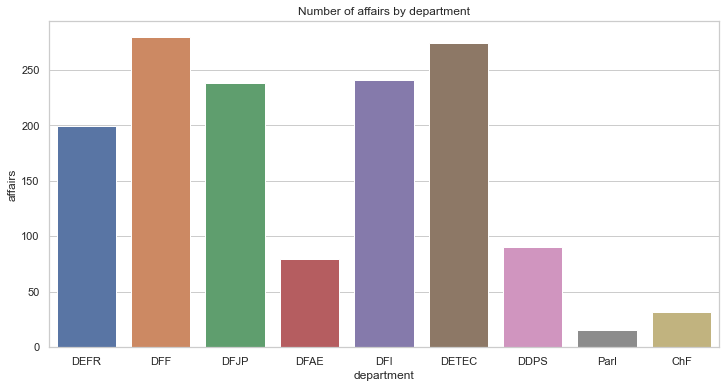

In [227]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
department_plot = sns.countplot (x='department', data=data_swissparl_2)
department_plot.set(xlabel='department', ylabel='affairs', title='Number of affairs by department')

[Text(0, 0.5, 'affairs'),
 Text(0.5, 0, 'commission'),
 Text(0.5, 1.0, 'Number of affairs by commission')]

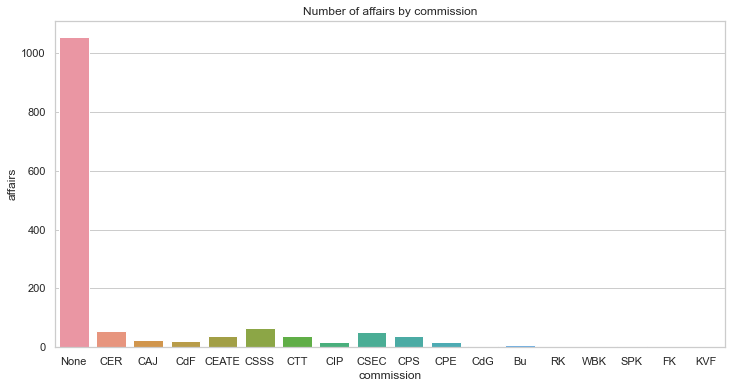

In [61]:
plt.figure(figsize=(12,6))
commission_plot = sns.countplot (x='commission', data=data_swissparl_2)
commission_plot.set(xlabel='commission', ylabel='affairs', title='Number of affairs by commission')

[Text(0, 0.5, 'affairs'),
 Text(0.5, 0, 'political party'),
 Text(0.5, 1.0, 'Number of affairs by political party')]

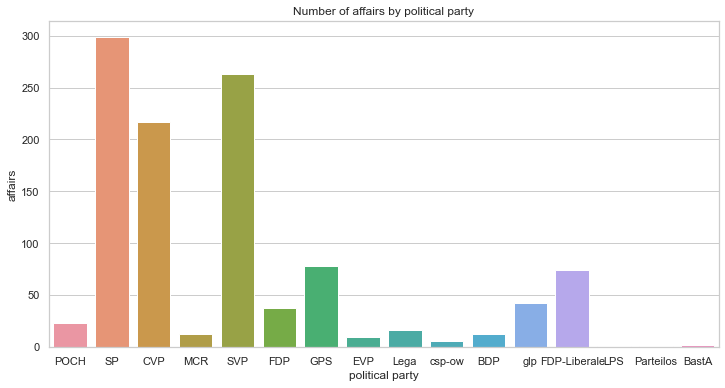

In [53]:
plt.figure(figsize=(12,6))

party_plot = sns.countplot (x='party', data=data_swissparl_2)
party_plot.set(xlabel='political party', ylabel='affairs', title='Number of affairs by political party')

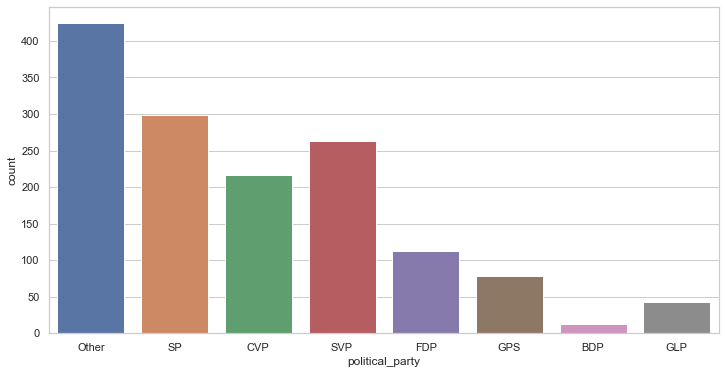

In [64]:
plt.figure(figsize=(12,6))
party_plot = sns.countplot (x='political_party', data=data_swissparl_2)

**Observation** :

 - With no surprise, left-wing parties (such as SP or GPS) are relatively filing more affairs than wing-right parties (FDP or SVP) which are more conservative

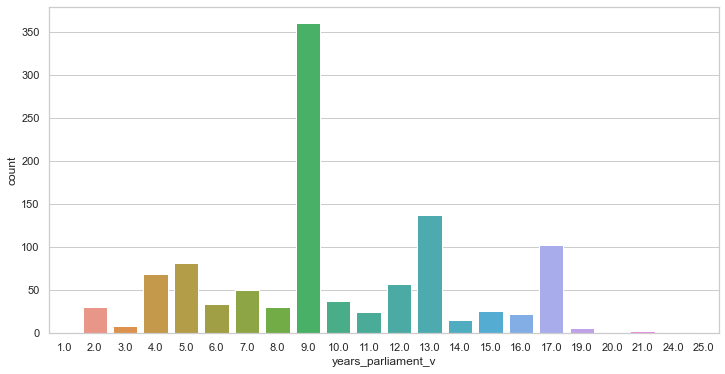

In [65]:
plt.figure(figsize=(12,6))
years_parliament_plot = sns.countplot (x='years_parliament_v', data=data_swissparl_2)

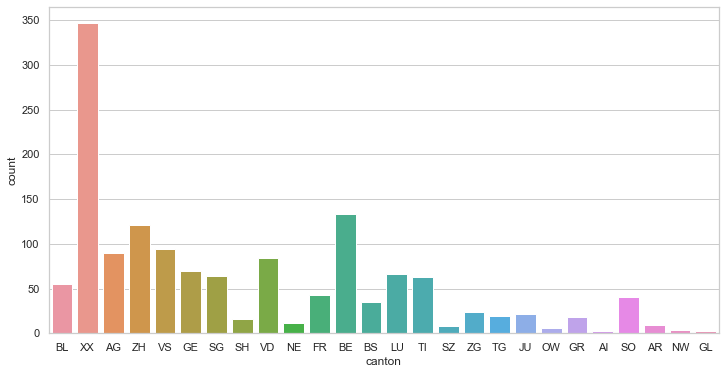

In [66]:
plt.figure(figsize=(12,6))
canton_plot = sns.countplot (x='canton', data=data_swissparl_2)

#### 3.2 Kurtosis and Skewness

First, the **Kurtosis** measure the 'tailedness' of the probability distribution. In other words, it describes the shape of the distribution. Are tails of the function bigger/smaller than a normal distribution (deviation from normal shape in tails)?

In [180]:
data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']].kurt()

yes_vote         0.075691
no_vote         -0.078758
abstain_vote    12.929000
missing_vote     3.724270
dtype: float64

**Observation** :
 - Regarding our two key variables of interest (yes_vote and no_vote), it seems like that it meets a normal distribution --> -1 > kurtosis_measure > 1
 - Distribution of abstain_vote and missing_vote is too peaked (kurtosis_measure > 1) --> positive kurtosis.

Second, the **skewness** measures the asymmetry of the distribution around its mean. In other words, a negative skew implies a tail on the left, and a positive skew means a tail on the right) 
--> A value of 0 indicate a symmetric distribution

In [181]:
data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']].skew()

yes_vote        0.540885
no_vote        -0.534956
abstain_vote    2.749006
missing_vote    1.564719
dtype: float64

**Observation** :
 - The distribution of YES vote is slightly skewed on the right (adoption of an affair is slightly less likely than rejection)
 - The distribution of NO vote is slightly skewed on the left (rejection of an affair is slightly more likely than adoption) --> politics is conservative
 - The distribution of ABSTAIN and MISSING is skewed on the right (no symmetric distribution). This is no surprise. MPs who abstain or miss a vote are a relatively small groups. It is unlikely that a large bunch of MPs ABSTAIN or MISS, but it might happen.

**Conclusion** :
 - Our 2 variables of interest YES and NO vote seems to follow a normal distribution.

### 4. Visualization / Graphs

#### 4.1 Histogram

Goal is to obtain a feeling of the distribution. Is it normal or no?

In [183]:
# Define subsets: I divide my dataset using affair_type (motion / postulat), and legislative_periods (49 / 50)
data_swissparl_motion_49 = data_swissparl_motion[data_swissparl_motion.legislative_periods_v_49==1]
data_swissparl_motion_50 = data_swissparl_motion[data_swissparl_motion.legislative_periods_v_49==0]
data_swissparl_postulat_49 = data_swissparl_postulat[data_swissparl_postulat.legislative_periods_v_49==1]
data_swissparl_postulat_50 = data_swissparl_postulat[data_swissparl_postulat.legislative_periods_v_49==0]

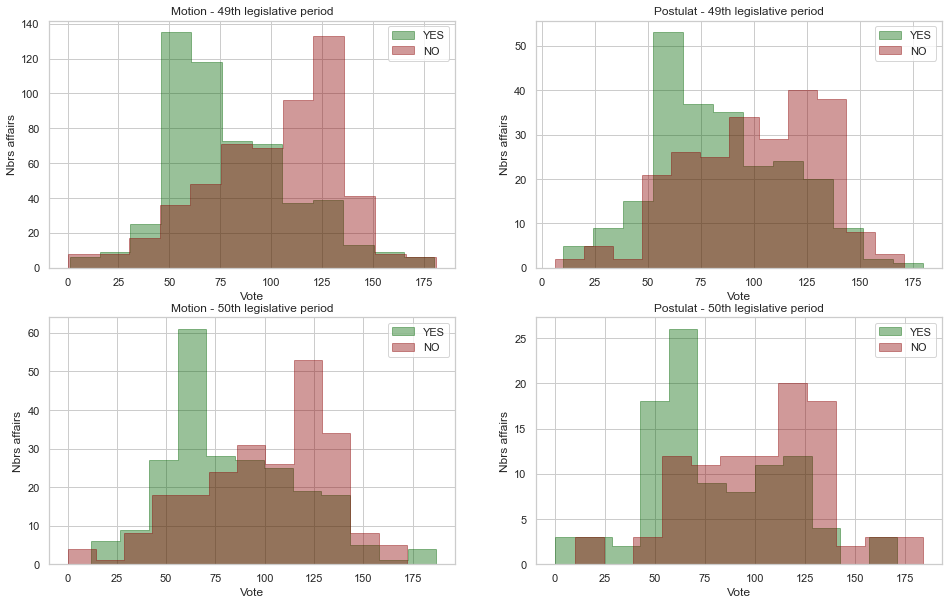

In [184]:
sns.set(style='whitegrid')
plt.subplot(221)
data_swissparl_motion_49['yes_vote'].plot(kind="hist", bins=12, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Motion - 49th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_motion_49['no_vote'].plot(kind="hist", bins=12, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()


plt.subplot(222)
data_swissparl_postulat_49['yes_vote'].plot(kind="hist", bins=12, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Postulat - 49th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_postulat_49['no_vote'].plot(kind="hist", bins=12, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()

plt.subplot(223)
data_swissparl_motion_50['yes_vote'].plot(kind="hist", bins=12, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Motion - 50th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_motion_50['no_vote'].plot(kind="hist", bins=12, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()


plt.subplot(224)
data_swissparl_postulat_50['yes_vote'].plot(kind="hist", bins=12, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Postulat - 50th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_postulat_50['no_vote'].plot(kind="hist", bins=12, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()

plt.savefig('histogram_affairs.jpeg')

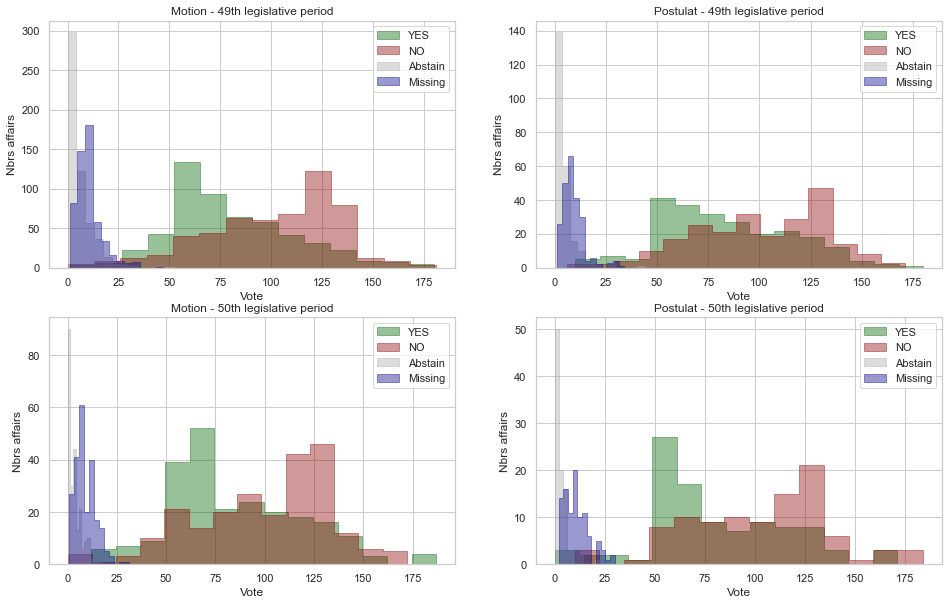

In [185]:
sns.set(style='whitegrid')
plt.subplot(221)
data_swissparl_motion_49['yes_vote'].plot(kind="hist", bins=14, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Motion - 49th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_motion_49['no_vote'].plot(kind="hist", bins=14, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
data_swissparl_motion_49['abstain_vote'].plot(kind="hist", bins=12, color="darkgray", alpha=0.4, fill=True, histtype='step', label="Abstain", figsize=(16,10))
data_swissparl_motion_49['missing_vote'].plot(kind="hist", bins=12, color="darkblue", alpha=0.4, fill=True, histtype='step', label="Missing", figsize=(16,10))
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()


plt.subplot(222)
data_swissparl_postulat_49['yes_vote'].plot(kind="hist", bins=14, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Postulat - 49th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_postulat_49['no_vote'].plot(kind="hist", bins=14, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
data_swissparl_postulat_49['abstain_vote'].plot(kind="hist", bins=12, color="darkgray", alpha=0.4, fill=True, histtype='step', label="Abstain", figsize=(16,10))
data_swissparl_postulat_49['missing_vote'].plot(kind="hist", bins=12, color="darkblue", alpha=0.4, fill=True, histtype='step', label="Missing", figsize=(16,10))
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()

plt.subplot(223)
data_swissparl_motion_50['yes_vote'].plot(kind="hist", bins=14, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Motion - 50th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_motion_50['no_vote'].plot(kind="hist", bins=14, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
data_swissparl_motion_50['abstain_vote'].plot(kind="hist", bins=12, color="darkgray", alpha=0.4, fill=True, histtype='step', label="Abstain", figsize=(16,10))
data_swissparl_motion_50['missing_vote'].plot(kind="hist", bins=12, color="darkblue", alpha=0.4, fill=True, histtype='step', label="Missing", figsize=(16,10))
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()


plt.subplot(224)
data_swissparl_postulat_50['yes_vote'].plot(kind="hist", bins=14, color="darkgreen", alpha=0.4, fill=True, histtype='step', title="Postulat - 50th legislative period", label="YES", figsize=(16,10))
ax_s = data_swissparl_postulat_50['no_vote'].plot(kind="hist", bins=14, color="darkred", fill=True, alpha=0.4, histtype='step', label="NO")
data_swissparl_postulat_50['abstain_vote'].plot(kind="hist", bins=12, color="darkgray", alpha=0.4, fill=True, histtype='step', label="Abstain", figsize=(16,10))
data_swissparl_postulat_50['missing_vote'].plot(kind="hist", bins=12, color="darkblue", alpha=0.4, fill=True, histtype='step', label="Missing", figsize=(16,10))
ax_s.set_xlabel('Vote')
ax_s.set_ylabel('Nbrs affairs')
plt.legend()

plt.savefig('histogram_affairs_all.jpeg')

#### 4.2 Scatterplot matrix

In [28]:
from pandas.plotting import scatter_matrix # subpackages = scatter_matrix

In [187]:
data_swissparl_scatter = data_swissparl_2[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote', 'own_party', 'party_v', 'canton_v', 'department_v', 'vote_hour']]

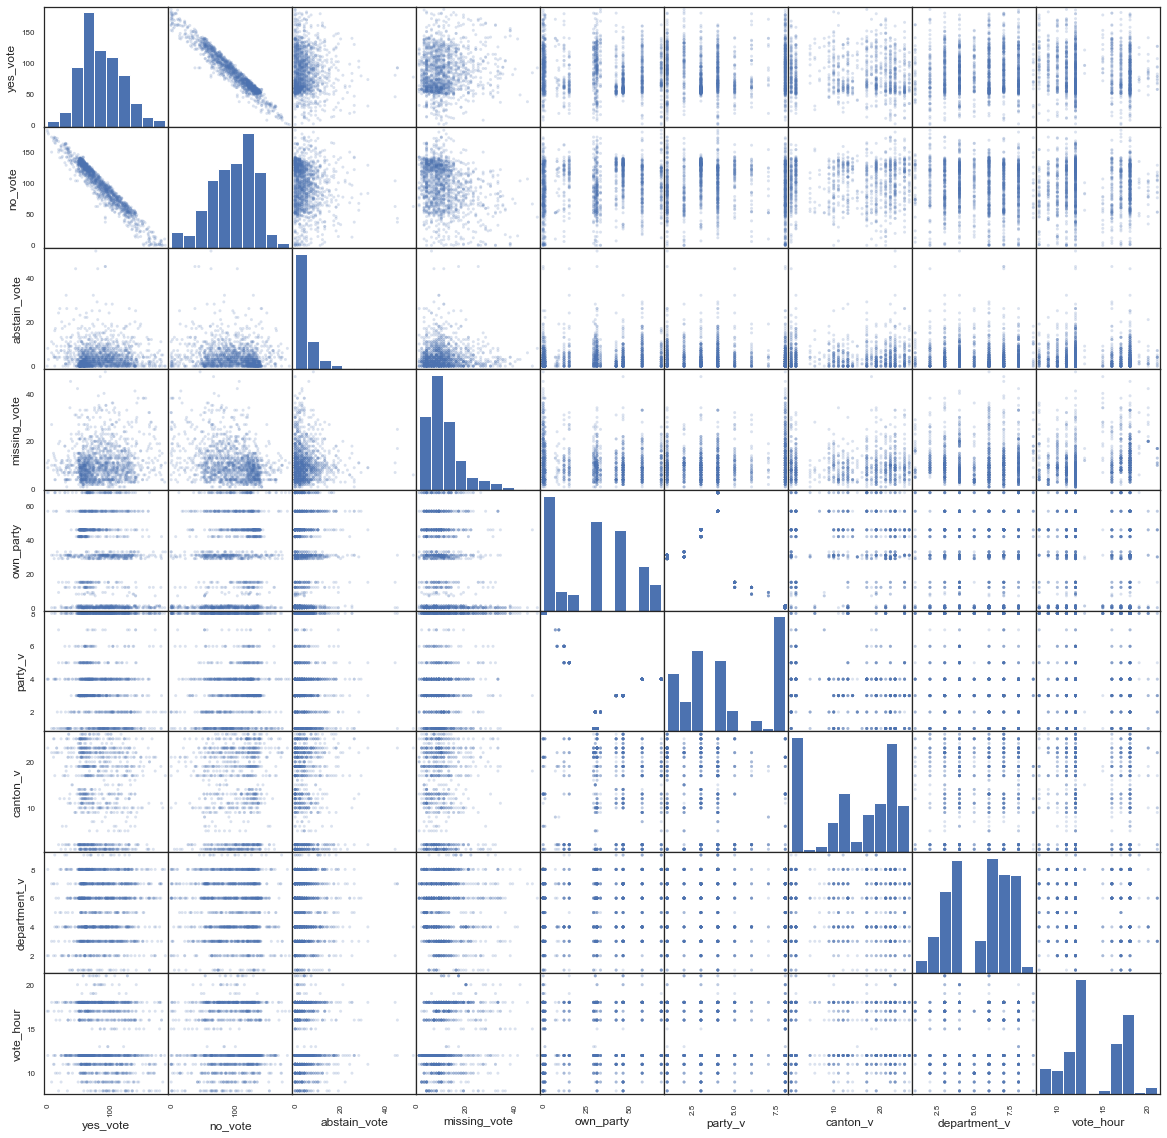

In [188]:
sns.set(style='white')
scatter_matrix(data_swissparl_scatter, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.show()

#### 4.3 Boxplot

In [176]:
data_swissparl_box = data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']]

In [177]:
my_pal = {"yes_vote": "darkgreen", "no_vote": "darkred", "abstain_vote":"darkgray", "missing_vote":"darkblue"}

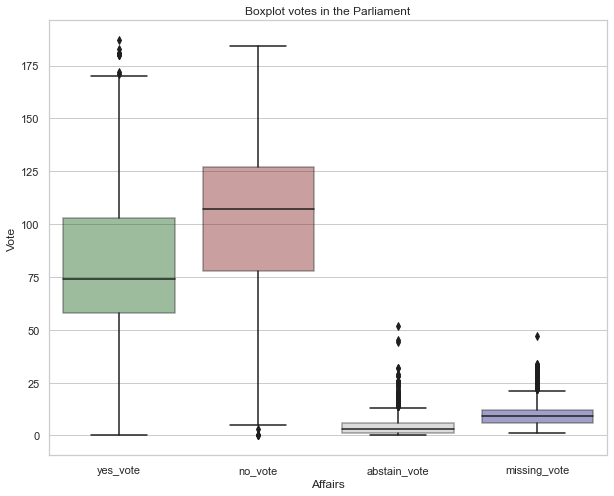

In [179]:
plt.figure(figsize=(10,8))
plt.title('Boxplot votes in the Parliament')
box = sns.boxplot (data=data_swissparl_box, palette=my_pal, boxprops=dict(alpha=0.4))
box.set_xlabel('Affairs')
box.set_ylabel('Vote')
plt.savefig('boxplot.jpeg')

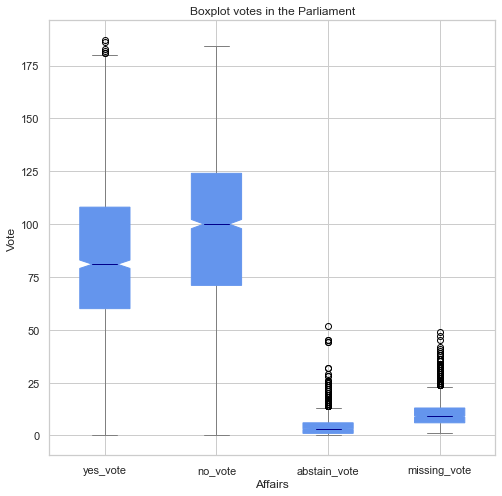

<Figure size 432x288 with 0 Axes>

In [33]:
color = dict(boxes='cornflowerblue', whiskers='gray', medians='DarkBlue', caps='Gray')
sns.set(style='whitegrid')
box = data_swissparl[['yes_vote', 'no_vote', 'abstain_vote', 'missing_vote']].plot.box (color=color, notch=True, patch_artist=True, figsize=(8,8), title='Boxplot votes in the Parliament')
box.set_xlabel('Affairs')
box.set_ylabel('Vote')
plt.show()
plt.savefig('boxplot.jpeg')

### 5. Preliminary studies

#### Linear regression

In [189]:
data_swissparl_reg = data_swissparl[['own_party', 'yes_vote', 'no_vote']]
own_party_v = data_swissparl_reg['own_party']
yes_vote_v = data_swissparl_reg['yes_vote']
slope, intercept, r_value, p_value, std_err = stats.linregress(own_party_v, yes_vote_v)
print (slope, intercept, std_err)

0.008032194873967115 81.09644859694778 0.05225840050162695


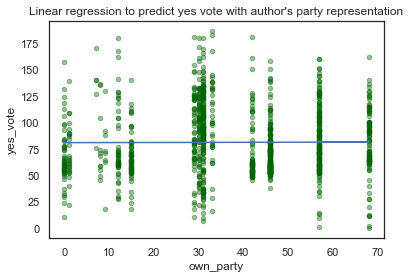

In [190]:
ax = data_swissparl_reg.plot(x='own_party', y='yes_vote', kind='scatter', c='darkgreen', alpha=0.4)
plt.plot(own_party_v, intercept+slope*own_party_v, 'b', label='Fitted treated line')
plt.title ("Linear regression to predict yes vote with author's party representation")
plt.show()

In [191]:
data_swissparl_reg = data_swissparl[['own_party', 'yes_vote', 'no_vote']]
own_party_v = data_swissparl_reg['own_party']
no_vote_v = data_swissparl_reg['no_vote']
slope, intercept, r_value, p_value, std_err = stats.linregress(own_party_v, no_vote_v)
print (slope, intercept, std_err)

-0.010318726010845294 101.27472250415572 0.05368861636263529


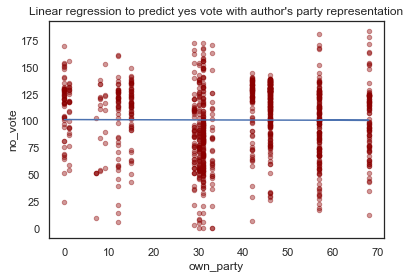

In [192]:
ax = data_swissparl_reg.plot(x='own_party', y='no_vote', kind='scatter', c='darkred', alpha=0.4)
plt.plot(own_party_v, intercept+slope*own_party_v, 'b', label='Fitted treated line')
plt.title ("Linear regression to predict yes vote with author's party representation")
plt.show()

**Observation** :
 - Being an MPs from the larger political party in Switzerland (MPs) has no positive influence on the probability to have its affair accepted. The trend is slightly negative. It confirms that Swiss politics is not about being the larger party but finding compromises. 

#### Machine learning

Most of my independent variables are categorical variables. Problem is, label encoding is straightforward but can be misinterpreted by machine learning method. To circumvent this problem, I used a one hot encoding method. It converts eachcategory value into a new variable assigns 1 or 0 (binary variable). It has the benefit of not weighting values incorrectly. 

In [76]:
data_swissparl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   v1                     1450 non-null   int64  
 1   id                     1450 non-null   int64  
 2   status                 1450 non-null   object 
 3   year                   1450 non-null   int64  
 4   sex                    1450 non-null   object 
 5   canton                 1450 non-null   object 
 6   party                  1098 non-null   object 
 7   party_name             1097 non-null   object 
 8   parl_group             1103 non-null   object 
 9   name                   1103 non-null   object 
 10  language               1450 non-null   object 
 11  date_join              1103 non-null   object 
 12  date_leave             302 non-null    object 
 13  council                1450 non-null   object 
 14  affair_number          1450 non-null   float64
 15  affa

In [98]:
data_swissparl

,sex_f,sex_m,sex_Undefined,canton_AG,canton_AI,canton_AR,canton_BE,canton_BL,canton_BS,canton_FR,...,GPS_parl,GLP_parl,BDP_parl,Other_parl,vote_hour,own_party,yes_vote,no_vote,abstain_vote,missing_vote
0,1,0,0,0,0,0,0,1,0,0,...,15,12,9,0,17,0,54,120,13,12
4,0,1,0,1,0,0,0,0,0,0,...,15,12,9,0,8,46,112,71,4,10
5,0,1,0,1,0,0,0,0,0,0,...,15,12,9,0,8,46,89,100,1,7
6,1,0,0,0,0,0,0,0,0,0,...,15,12,9,0,18,46,68,103,6,22
7,0,1,0,0,0,0,0,0,0,0,...,15,12,9,0,18,31,105,67,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0,1,0,0,0,0,0,0,0,0,...,15,12,9,0,12,57,81,88,15,15
1434,0,1,0,0,0,0,0,0,0,0,...,15,12,9,0,10,57,126,46,18,9
1435,0,1,0,0,0,0,1,0,0,0,...,15,12,9,0,17,57,106,74,4,11
1438,0,1,0,0,0,0,1,0,0,0,...,15,12,9,0,18,57,99,80,5,13


In [193]:
data_useful_fields = data_swissparl[['sex_f', 'sex_m', 'sex_Undefined', 'canton_AG', 'canton_AI', 'canton_AR',
                                    'canton_BE','canton_BL','canton_BS','canton_FR','canton_GE','canton_GL',
                                    'canton_AG','canton_GR','canton_JU','canton_LU','canton_NE', 'canton_NW',
                                    'canton_OW', 'canton_SG','canton_SH','canton_SO', 'canton_SZ','canton_TG',
                                    'canton_TI', 'canton_VD','canton_VS','canton_XX','canton_ZH','canton_ZG',
                                    'political_party_CVP','political_party_FDP','political_party_SP', 'political_party_SVP',
                                    'political_party_GPS','political_party_GLP','political_party_BDP', 'political_party_Other',
                                    'affair_type_Motion', 'year_affair_11', 'year_affair_12','year_affair_13','year_affair_14',
                                    'year_affair_15', 'year_affair_16', 'year_affair_17', 'year_affair_18', 'legislative_periods_v_49',
                                    'commission_Bu', 'commission_CAJ', 'commission_CEATE','commission_CER', 'commission_CIP', 'commission_CPE',
                                    'commission_CPS', 'commission_CSEC','commission_CSSS','commission_CTT', 'commission_CdF','commission_CdG',
                                    'commission_FK','commission_KVF','commission_None','commission_RK','commission_SPK','commission_WBK',
                                    'department_ChF','department_DDPS','department_DEFR', 'department_DETEC','department_DFAE',
                                    'department_DFF','department_DFI','department_DFJP','department_Parl', 'years_parliament_v',
                                    'CVP_parl', 'FDP_parl', 'SP_parl','SVP_parl', 'GPS_parl','GLP_parl','BDP_parl', 'Other_parl', 
                                    'vote_hour', 'own_party']]

In [194]:
data_target_field_yes = data_swissparl['yes_vote']
data_target_field_no = data_swissparl['no_vote']
data_target_field_abstain = data_swissparl['abstain_vote']
data_target_field_missing = data_swissparl['missing_vote']

In [101]:
x = data_useful_fields.to_numpy().astype(np.float32)
y_yes = data_target_field_yes.to_numpy().astype(np.float32)
y_no = data_target_field_no.to_numpy().astype(np.float32)
y_abstain = data_target_field_abstain.to_numpy().astype(np.float32)
y_missing = data_target_field_missing.to_numpy().astype(np.float32)

In [102]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#### Yes vote

In [103]:
x_train_yes, x_test_yes, y_train_yes, y_test_yes = train_test_split(x, y_yes, test_size=0.2) # 20% for the test size

In [104]:
reg_yes = linear_model.LinearRegression() # create an object reg  and use a linear model
reg_yes.fit(x_train_yes, y_train_yes) # then we do the fit (.fit method) we use the taining data

LinearRegression()

In [105]:
# 3. evaluate MSE, MAD, and R2 on train and test datasets
#prediction:
y_p_train_yes = reg_yes.predict(x_train_yes) # give the training set (columns) use the model to calculate yes votes
y_p_test_yes = reg_yes.predict(x_test_yes) # do the same for the test set

In [106]:
#mse
print('train mse =', np.std(y_train_yes - y_p_train_yes)) # compare real vote and predicted vote to determine how good I am in prediction
print('test mse =', np.std(y_test_yes - y_p_test_yes)) # look also for test set (if variation is too large --> overfitting)
# mae
print('train mae =', np.mean(np.abs(y_train_yes - y_p_train_yes)))
print('test mae =', np.mean(np.abs(y_test_yes - y_p_test_yes)))
# R2
print('train R2 =', reg_yes.score(x_train_yes, y_train_yes))
print('test R2 =', reg_yes.score(x_test_yes, y_test_yes))

train mse = 25.763424
test mse = 27.109703
train mae = 19.672247
test mae = 20.34679
train R2 = 0.3557371420042734
test R2 = 0.2821177369651263


**Observation** :
 - The variation between the train and the test set is small. The error is approximatly 27 votes. The error of the test set is slightly higher (32 votes). 
 
**Conclusion** :
 - In 2/3 of the time, I am able to predict vote choice within a range of approximately 27 votes. 


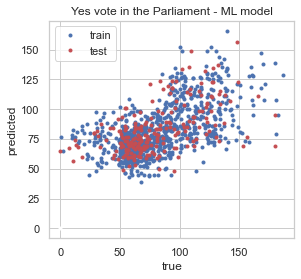

In [107]:
# Plot y vs predicted y for test and train parts
plt.plot(y_train_yes, y_p_train_yes, 'b.', label='train')
plt.plot(y_test_yes, y_p_test_yes, 'r.', label='test')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.title('Yes vote in the Parliament - ML model')
plt.legend()

**Test over- under-fitting**

In [108]:
# 10%
x_train_yes_10, x_test_yes_10, y_train_yes_10, y_test_yes_10 = train_test_split(x, y_yes, test_size=0.1) # 10%
reg_yes_10 = linear_model.LinearRegression()
reg_yes_10.fit(x_train_yes_10, y_train_yes_10)
y_p_train_yes_10 = reg_yes_10.predict(x_train_yes_10)
y_p_test_yes_10 = reg_yes_10.predict(x_test_yes_10) # do the same for the test set
print('10%: train mse =', np.std(y_train_yes_10 - y_p_train_yes_10)) 
print('10%: test mse =', np.std(y_test_yes_10 - y_p_test_yes_10))

10%: train mse = 25.070671
10%: test mse = 28.634518


In [145]:
# 20%
x_train_yes_20, x_test_yes_20, y_train_yes_20, y_test_yes_20 = train_test_split(x, y_yes, test_size=0.2) # 20%
reg_yes_20 = linear_model.LinearRegression()
reg_yes_20.fit(x_train_yes_20, y_train_yes_20)
y_p_train_yes_20 = reg_yes_20.predict(x_train_yes_20)
y_p_test_yes_20 = reg_yes_20.predict(x_test_yes_20) # do the same for the test set
print('20%: train mse =', np.std(y_train_yes_20 - y_p_train_yes_20)) 
print('20%: test mse =', np.std(y_test_yes_20 - y_p_test_yes_20))
print('train mae =', np.mean(np.abs(y_train_yes - y_p_train_yes)))
print('test mae =', np.mean(np.abs(y_test_yes - y_p_test_yes)))
print('train R2 =', reg_yes.score(x_train_yes, y_train_yes))
print('test R2 =', reg_yes.score(x_test_yes, y_test_yes))

20%: train mse = 25.567383
20%: test mse = 25.022598
train mae = 19.672247
test mae = 20.34679
train R2 = 0.3557371420042734
test R2 = 0.2821177369651263


In [110]:
# 25%
x_train_yes_25, x_test_yes_25, y_train_yes_25, y_test_yes_25 = train_test_split(x, y_yes, test_size=0.25) # 25%
reg_yes_25 = linear_model.LinearRegression()
reg_yes_25.fit(x_train_yes_25, y_train_yes_25)
y_p_train_yes_25 = reg_yes_25.predict(x_train_yes_25)
y_p_test_yes_25 = reg_yes_25.predict(x_test_yes_25) # do the same for the test set
print('25%: train mse =', np.std(y_train_yes_25 - y_p_train_yes_25)) 
print('25%: test mse =', np.std(y_test_yes_25 - y_p_test_yes_25))

25%: train mse = 25.408577
25%: test mse = 25.993969


In [111]:
# 30%
x_train_yes_30, x_test_yes_30, y_train_yes_30, y_test_yes_30 = train_test_split(x, y_yes, test_size=0.3) # 30%
reg_yes_30 = linear_model.LinearRegression()
reg_yes_30.fit(x_train_yes_30, y_train_yes_30)
y_p_train_yes_30 = reg_yes_30.predict(x_train_yes_30)
y_p_test_yes_30 = reg_yes_30.predict(x_test_yes_30) # do the same for the test set
print('30%: train mse =', np.std(y_train_yes_30 - y_p_train_yes_30)) 
print('30%: test mse =', np.std(y_test_yes_30 - y_p_test_yes_30))

30%: train mse = 26.398743
30%: test mse = 29.968546


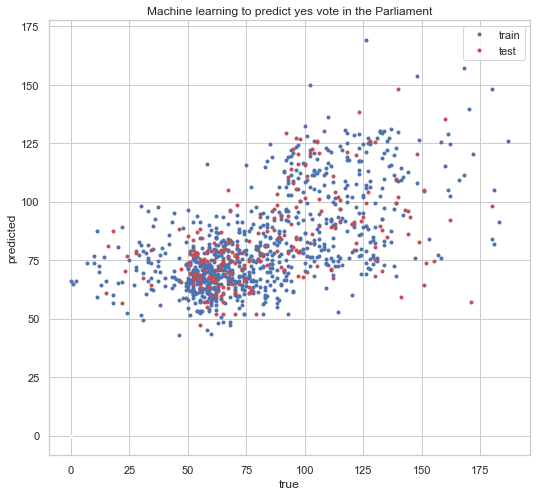

In [139]:
plt.figure(figsize=(12,8))
plt.plot(y_train_yes_20, y_p_train_yes_20, 'b.', label='train')
plt.plot(y_test_yes_20, y_p_test_yes_20, 'r.', label='test')

plt.plot([0], [0], 'w.')
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.title('Machine learning to predict yes vote in the Parliament')
plt.legend()

##### No vote

In [115]:
x_train_no, x_test_no, y_train_no, y_test_no = train_test_split(x, y_no, test_size=0.2) # 20% for the test size
reg_no = linear_model.LinearRegression() 
reg_no.fit(x_train_no, y_train_no)
y_p_train_no = reg_no.predict(x_train_no) 
y_p_test_no = reg_no.predict(x_test_no) 

In [195]:
print('train mse =', np.std(y_train_no - y_p_train_no)) 
print('test mse =', np.std(y_test_no - y_p_test_no)) 
print('train mae =', np.mean(np.abs(y_train_no - y_p_train_no)))
print('test mae =', np.mean(np.abs(y_test_no - y_p_test_no)))
print('train R2 =', reg_no.score(x_train_no, y_train_no))
print('test R2 =', reg_no.score(x_test_no, y_test_no))

train mse = 25.37234
test mse = 27.799252
train mae = 19.252811
test mae = 21.403227
train R2 = 0.40368086290229144
test R2 = 0.31058672209628135


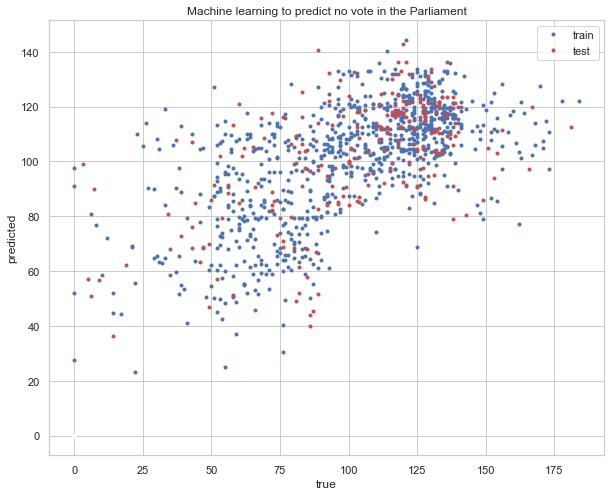

In [117]:
plt.figure(figsize=(12,8))
plt.plot(y_train_no, y_p_train_no, 'b.', label='train')
plt.plot(y_test_no, y_p_test_no, 'r.', label='test')

plt.plot([0], [0], 'w.')
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.title('Machine learning to predict no vote in the Parliament')
plt.legend()

#### Abstain vote

In [118]:
x_train_abstain, x_test_abstain, y_train_abstain, y_test_abstain = train_test_split(x, y_abstain, test_size=0.2) # 25% for the test size
reg_abstain = linear_model.LinearRegression() 
reg_abstain.fit(x_train_abstain, y_train_abstain)
y_p_train_abstain = reg_abstain.predict(x_train_yes) 
y_p_test_abstain = reg_abstain.predict(x_test_yes) 

In [119]:
print('train mse =', np.std(y_train_abstain - y_p_train_abstain)) 
print('test mse =', np.std(y_test_abstain - y_p_test_abstain)) 

train mse = 5.9834228
test mse = 5.076383


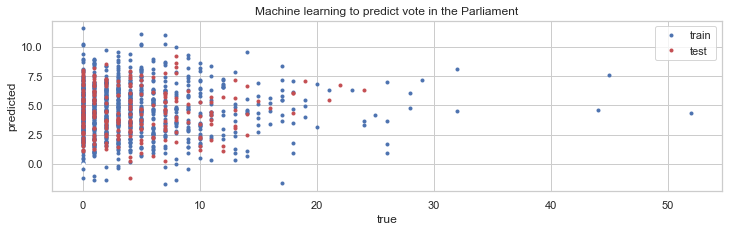

In [120]:
plt.figure(figsize=(12,8))
plt.plot(y_train_abstain, y_p_train_abstain, 'b.', label='train')
plt.plot(y_test_abstain, y_p_test_abstain, 'r.', label='test')

plt.plot([0], [0], 'w.')
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.title('Machine learning to predict vote in the Parliament')
plt.legend()

In [121]:
x_train_missing, x_test_missing, y_train_missing, y_test_missing = train_test_split(x, y_missing, test_size=0.2) # 25% for the test size
reg_missing = linear_model.LinearRegression() 
reg_missing.fit(x_train_missing, y_train_missing)
y_p_train_missing = reg_missing.predict(x_train_yes) 
y_p_test_missing = reg_missing.predict(x_test_yes) 

In [122]:
print('train mse =', np.std(y_train_missing - y_p_train_missing)) 
print('test mse =', np.std(y_test_missing - y_p_test_missing)) 

train mse = 6.764625
test mse = 6.3452425


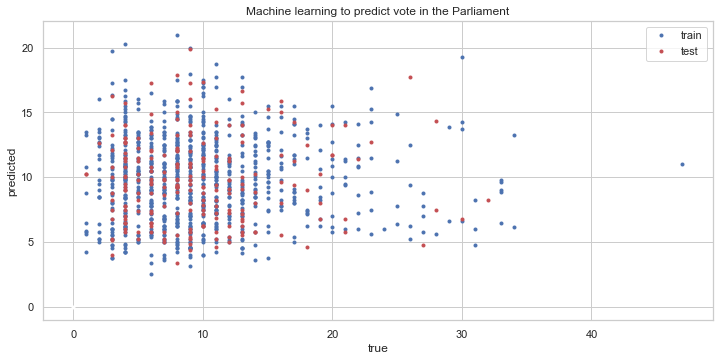

In [123]:
plt.figure(figsize=(12,8))
plt.plot(y_train_missing, y_p_train_missing, 'b.', label='train')
plt.plot(y_test_missing, y_p_test_missing, 'r.', label='test')

plt.plot([0], [0], 'w.')
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.title('Machine learning to predict vote in the Parliament')
plt.legend()

In [198]:
data_range = data_swissparl['yes_vote']-data_swissparl['no_vote']

In [199]:
data_range.describe()

count    1103.000000
mean      -19.491387
std        64.631776
min      -184.000000
25%       -68.000000
50%       -34.000000
75%        25.000000
max       187.000000
dtype: float64

In [201]:
l=-20
k=20
count = 0
for i in data_range : 
    if i < l : 
        count = count + 1
    if i >k :
        count = count + 1

In [202]:
count

905

#### Others

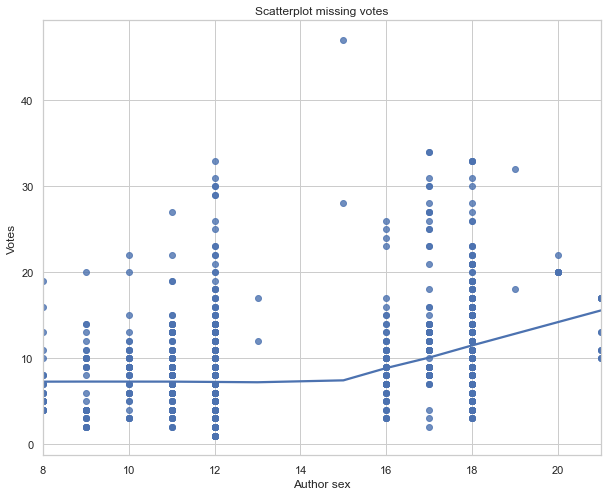

In [238]:
plt.figure(figsize=(10,8))
plt.title('Scatterplot missing votes')
scatter_missing=sns.regplot(data=data_swissparl, x='vote_hour', y='missing_vote', lowess=True)
scatter_missing.set_xlabel('Author sex')
scatter_missing.set_ylabel('Votes')
plt.savefig('scatter_missing.jpeg')

**Observation** :
 - MPs are missing more vote at the end of the day (after 17pm). Hard to stay at office when you can be drinking in MPs parties

In [224]:
data_swissparl_sex = data_swissparl[['sex_m', 'sex_f']]

In [230]:
my_pal = {"m": "darkblue", "f": "pink", "Undefined": "darkgreen"}

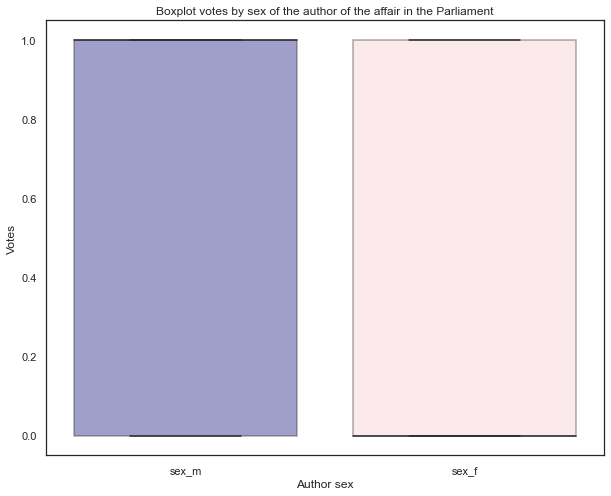

In [226]:
plt.figure(figsize=(10,8))
plt.title('Boxplot votes by sex of the author of the affair in the Parliament')
box = sns.boxplot (data=data_swissparl_sex, palette=my_pal, boxprops=dict(alpha=0.4))
box.set_xlabel('Author sex')
box.set_ylabel('Votes')
plt.savefig('boxplot_sex.jpeg')

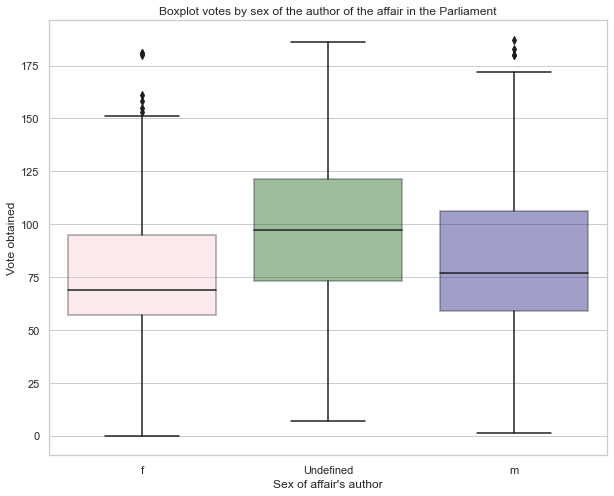

In [231]:
plt.figure(figsize=(10,8))
plt.title('Boxplot votes by sex of the author of the affair in the Parliament')
box = sns.boxplot (y='yes_vote', x='sex', data=data_swissparl_2,palette=my_pal, boxprops=dict(alpha=0.4))
box.set_xlabel("Sex of affair's author")
box.set_ylabel('Vote obtained')
plt.savefig('boxplot_sex.jpeg')

In [233]:
mean_sexvote = data_swissparl_2['yes_vote'].groupby(data_swissparl_2['sex']).mean()
print(mean_sexvote)

sex
Undefined    98.432277
f            77.642276
m            83.284741
Name: yes_vote, dtype: float64


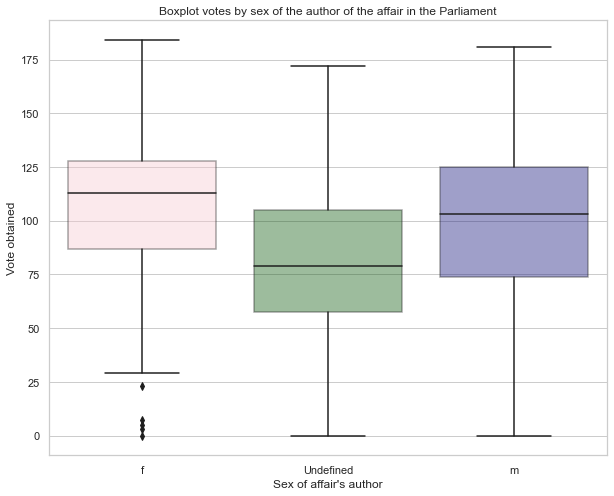

In [234]:
plt.figure(figsize=(10,8))
plt.title('Boxplot votes by sex of the author of the affair in the Parliament')
box = sns.boxplot (y='no_vote', x='sex', data=data_swissparl_2,palette=my_pal, boxprops=dict(alpha=0.4))
box.set_xlabel("Sex of affair's author")
box.set_ylabel('Vote obtained')
plt.savefig('boxplot_sex.jpeg')